In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
train_df=pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
train_df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
test_df=pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")
test_df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [4]:
train_df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [5]:
test_df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name'],
      dtype='object')

In [6]:
train_df['Transported']=train_df['Transported'].apply(lambda x:1 if x==True else 0)

In [7]:
train_df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1


In [8]:
train_df['VIP']=train_df['VIP'].apply(lambda x:1 if x==True else 0)

In [9]:
vip = train_df.loc[train_df.VIP == 1]["Transported"]
saved = sum(vip)/len(vip)

print("% of vip who are saved:", saved)

% of vip who are saved: 0.38190954773869346


In [10]:
nvip = train_df.loc[train_df.VIP == 0]["Transported"]
nsaved = sum(nvip)/len(nvip)

print("% of people who are not vip but still saved:", nsaved)

% of people who are not vip but still saved: 0.5064751589357194


In [11]:
train_df.drop('VIP',axis=1,inplace=True)

## So VIP column is not related to transport we will drop it.

In [12]:
train_df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [13]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8693.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791,0.503624
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189,0.500016
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000,1.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,1.000000


/tmp/ipykernel_32/973442360.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_df.corr()


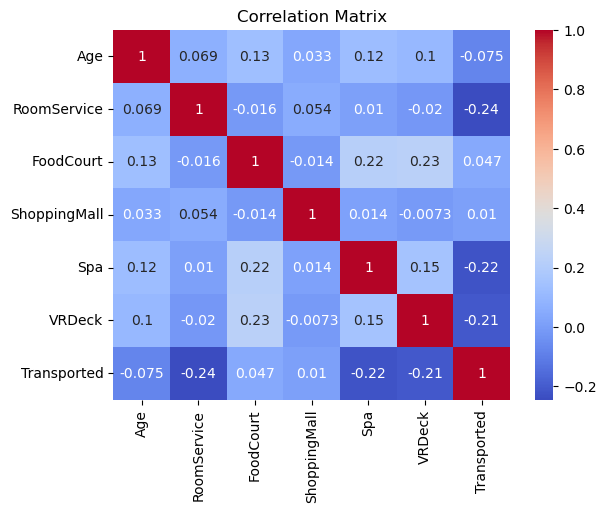

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the columns you want to analyze
correlation_matrix = train_df.corr()

# Create a heatmap using the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

# Set the title of the plot
plt.title("Correlation Matrix")

# Display the plot
plt.show()

## No 2 features are highly correlated 

In [15]:
train_df.drop(columns=['PassengerId',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name'],inplace=True)
test_df.drop(columns=['PassengerId',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name','VIP'],inplace=True)

# Dropping the useless columns and nan value

In [16]:
train_df['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [17]:
train_df[train_df.duplicated()]

,HomePlanet,CryoSleep,Cabin,Destination,Age,Transported
364,Mars,False,D/14/S,TRAPPIST-1e,30.0,0
470,Europa,True,B/19/S,55 Cancri e,18.0,1
617,Europa,True,C/25/S,55 Cancri e,30.0,1
949,Earth,False,NaN,TRAPPIST-1e,31.0,0
1035,Mars,False,F/226/P,TRAPPIST-1e,18.0,0
2084,Mars,True,F/448/P,55 Cancri e,20.0,1
2333,Earth,False,NaN,TRAPPIST-1e,28.0,0
3027,Europa,True,C/123/S,TRAPPIST-1e,28.0,1
3044,Europa,False,NaN,55 Cancri e,52.0,0
3234,Earth,False,G/571/P,55 Cancri e,0.0,1


In [18]:
train_df.isnull().sum()

HomePlanet     201
CryoSleep      217
Cabin          199
Destination    182
Age            179
Transported      0
dtype: int64

## Replacing the  null values with the mode values and median values

In [19]:
train_df.mode()

,HomePlanet,CryoSleep,Cabin,Destination,Age,Transported
0,Earth,False,G/734/S,TRAPPIST-1e,24.0,1


In [20]:
train_df['CryoSleep'].fillna(False, inplace=True)
train_df.isnull().sum()

HomePlanet     201
CryoSleep        0
Cabin          199
Destination    182
Age            179
Transported      0
dtype: int64

In [21]:
train_df['HomePlanet'].fillna('Earth', inplace=True)
train_df['Cabin'].fillna('G/734/S', inplace=True)
train_df['Destination'].fillna('TRAPPIST-1e', inplace=True)
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)

In [22]:
test_df.isnull().sum()

HomePlanet      87
CryoSleep       93
Cabin          100
Destination     92
Age             91
dtype: int64

In [23]:
test_df['CryoSleep'].fillna(False, inplace=True)
test_df['HomePlanet'].fillna('Earth', inplace=True)
test_df['Cabin'].fillna('G/734/S', inplace=True)
test_df['Destination'].fillna('TRAPPIST-1e', inplace=True)
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)

In [24]:
train_df.isnull().sum()

HomePlanet     0
CryoSleep      0
Cabin          0
Destination    0
Age            0
Transported    0
dtype: int64

In [25]:
test_df.isnull().sum()

HomePlanet     0
CryoSleep      0
Cabin          0
Destination    0
Age            0
dtype: int64

In [26]:
train_df.columns

Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'Transported'],
      dtype='object')

In [27]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for x in train_df:
    if train_df[x].dtype == 'object' or x == 'CryoSleep' or x == 'VIP' or x == 'Transported':
        train_df[x] = le.fit_transform(train_df[x])
train_df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,Transported
0,1,0,149,2,39.0,0
1,0,0,2184,2,24.0,1
2,1,0,1,2,58.0,0
3,1,0,1,2,33.0,0
4,0,0,2186,2,16.0,1


## Logistic Regression

In [30]:
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Prepare your data
x, y = train_df.iloc[:, 0:10], np.array(train_df['Transported'])
scaler = StandardScaler()  
x = scaler.fit_transform(x)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25)

# Train the logistic regression model
model = linear_model.LogisticRegression()
model.fit(xtrain, ytrain)

# Make predictions
ypred = model.predict(xtest)

# Evaluate the model
print("Accuracy: ", accuracy_score(ytest, ypred))

Accuracy:  1.0
